### Credit Rating - Feature Selection - CNN 
#### Project Progress:
1. Understanding the variables
    - compared the variables with accounting items from Statement of Financial Position, Income Statement, Statement of Cash Flow
2. Dealing with Missing Values
    - Compared the heatmap of 5 sectors and found:
        - variables that are completely empty
        - variables that are periodically empty
    - Dropped variables that are completely in all sectors (38 in total)
    <img src="./img/1.png">
    - Found variables that only exists in the financial sector: drop these variables in other sectors (11 in total)
    <img src="./img/2.png">
    - Found variables that do not exists in the healthcare sector & industry sector : drop these variables in these two sectors (3 in total)
    <img src="./img/3.png">
    - replace NaN with 0
3. Rearrange the order of remaining features, following the formate of reported financial statements
4. Reshape the observations into 3D arrays by company:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_consumer = pd.read_excel('Data/Consumer.xlsx')
df_financial = pd.read_excel('Data/Financial.xlsx')
df_healthcare = pd.read_excel('Data/Healthcare.xlsx')
df_industry = pd.read_excel('Data/Industry.xlsx')
df_it = pd.read_excel('Data/IT.xlsx')

In [3]:
print(df_consumer.shape)
print(df_financial.shape)
print(df_healthcare.shape)
print(df_industry.shape)
print(df_it.shape)

(5392, 346)
(4640, 346)
(4285, 346)
(4651, 346)
(4899, 346)


# Heatmap

<IPython.core.display.Javascript object>


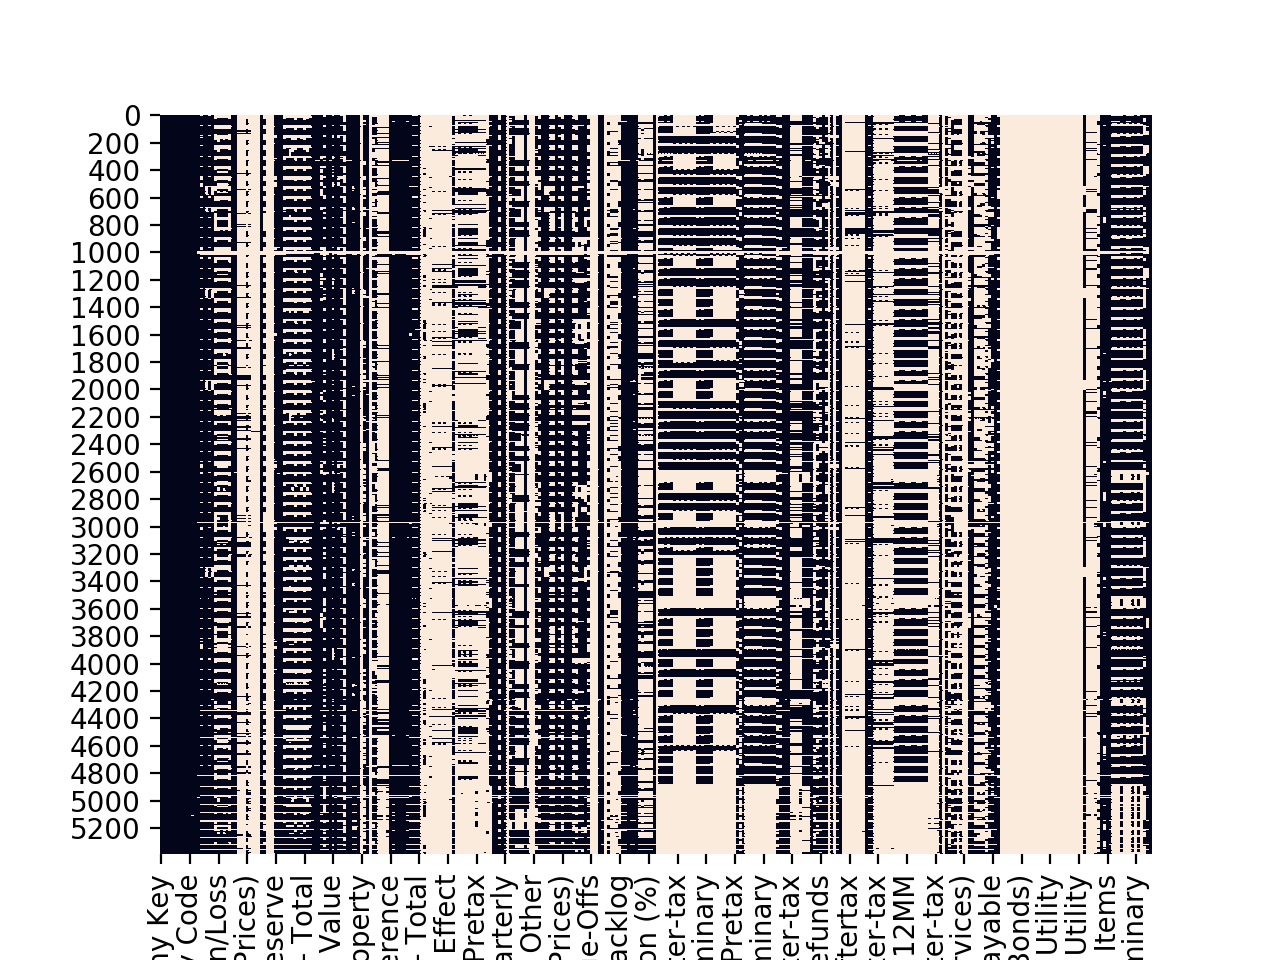

In [4]:
%matplotlib notebook
sns.heatmap(df_consumer.isnull(), cbar=False)

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_financial.isnull(), cbar=False)

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_healthcare.isnull(), cbar=False)

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_industry.isnull(), cbar=False)

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_it.isnull(), cbar=False)

# Empty Columns

In [6]:
consumer = df_consumer.isnull().sum()/5392
financial = df_financial.isnull().sum()/4640
healthcare = df_healthcare.isnull().sum()/4285
industry = df_industry.isnull().sum()/4651
it = df_it.isnull().sum()/4899
null = pd.concat([consumer.rename('consumer'), 
                  financial.rename('financial'), 
                  healthcare.rename('healthcare'), 
                  industry.rename('industry'), 
                  it.rename('it')], axis=1)


In [7]:
null0 = null.where((null['consumer'] == 1.0) | 
                   (null['financial'] == 1.0) |
                   (null['healthcare'] == 1.0) | 
                   (null['industry'] == 1.0) | 
                   (null['it'] == 1.0) ).dropna()

In [8]:
null0

,consumer,financial,healthcare,industry,it
As Reported Core - Diluted EPS Effect,0.998516,0.995690,1.0,1.0,0.997755
As Reported Core - Basic EPS Effect,0.998516,0.995690,1.0,1.0,0.997755
As Reported Core - After-tax,0.998516,0.995690,1.0,1.0,0.997755
Risk-Adjusted Capital Ratio - Tier 1,1.000000,0.710991,1.0,1.0,1.000000
Risk-Adjusted Capital Ratio - Tier 2,1.000000,0.710991,1.0,1.0,1.000000
Risk-Adjusted Capital Ratio - Combined,1.000000,0.710991,1.0,1.0,1.000000
Accumulated Depreciation of RE Property,1.000000,1.000000,1.0,1.0,1.000000
Depr/Amort of Property,1.000000,1.000000,1.0,1.0,1.000000
Equity in Earnings (I/S) - Unconsolidated Subsidiaries,1.000000,1.000000,1.0,1.0,1.000000
Funds From Operations (REIT),1.000000,1.000000,1.0,1.0,1.000000


In [7]:
# variables that are completely empty in all sectors #count: 38
null1 = null0.where((null['financial'] == 1.0)).dropna()
null1.index.tolist()

['Accumulated Depreciation of RE Property',
 'Depr/Amort of Property',
 'Equity in Earnings (I/S) - Unconsolidated Subsidiaries',
 'Funds From Operations (REIT)',
 'Interest Accrued',
 'Investment and Advances - Equity',
 'Investment and Advances - Other',
 'Total RE Property',
 'Gain/Loss on Sale of Property',
 'Current Assets - Other - Utility',
 'Other Assets - Utility',
 'Accounts Payable - Utility',
 'Paid In Capital - Other - Utility',
 'Contributions In Aid Of Construction',
 'Common Equity - Total - Utility',
 'Debt (Debentures) - Utility',
 'Debt (Mortgage Bonds)',
 'Debt (Other Long-Term)',
 'Debt (Pollution Control Obligations)',
 'Preferred Dividend Requirements',
 'Gross Income (Income Before Interest Charges)',
 'Inventories',
 'Current Liabilities - Other',
 'Net Income before Extraordinary Items After Noncontrolling Interest',
 'Nonoperating Income (Net) - Other',
 'Operating Income - Total - Utility',
 'Preference Dividend Requirements - Utility',
 'Premium On Common S

In [8]:
# variables that only exists in the financial sector: 
# drop these variables in sectors: consumer, healthcare, industry, it
# count 11
null2 = null0.where((null0['financial'] != 1) & (null0['consumer'] == null0['it']) ).dropna()
null2.index.tolist()

['Risk-Adjusted Capital Ratio - Tier 1',
 'Risk-Adjusted Capital Ratio - Tier 2',
 'Risk-Adjusted Capital Ratio - Combined',
 'Net Charge-Offs',
 'Net Interest Income (Tax Equivalent)',
 'Net Interest Margin',
 'Nonperforming Assets - Total',
 'Provision for Loan/Asset Losses',
 'Reserve for Loan/Asset Losses',
 'Interest Expense - Total (Financial Services)',
 'Interest Income - Total (Financial Services)']

In [9]:
# variables that are empty in healthcare & industry sector - drop
# count 3
null3 = null0.where( (null0['healthcare'] == null0['industry']) & (null0['consumer'] != 1)).dropna()
null3.index.tolist()

['As Reported Core - Diluted EPS Effect',
 'As Reported Core - Basic EPS Effect',
 'As Reported Core - After-tax']

In [10]:
df_consumer1 = df_consumer.drop(columns= (null1.index.tolist() + null2.index.tolist())).fillna(0) #297 cols

In [11]:
df_consumer1.head()

,Global Company Key,Data Date,Fiscal Year,Fiscal Quarter,Industry Format,Level of Consolidation - Company Interim Descriptor,Population Source,Data Format,Ticker Symbol,Company Name,...,Implied Option EPS Diluted Preliminary,Implied Option EPS Basic 12MM,Implied Option 12MM EPS Basic Preliminary,Implied Option EPS Basic,Implied Option EPS Basic Preliminary,Implied Option Expense,Implied Option Expense Preliminary,Research and Development Expense,"Selling, General and Administrative Expenses",Active/Inactive Status Marker
0,2184,20000229,1999,4,INDL,C,D,STD,BBY,BEST BUY CO INC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,555.176,A
1,2184,20000531,2000,1,INDL,C,D,STD,BBY,BEST BUY CO INC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497.075,A
2,2184,20000831,2000,2,INDL,C,D,STD,BBY,BEST BUY CO INC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,533.395,A
3,2184,20001130,2000,3,INDL,C,D,STD,BBY,BEST BUY CO INC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,604.028,A
4,2184,20010228,2000,4,INDL,C,D,STD,BBY,BEST BUY CO INC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,805.287,A


# np.reshape()

In [12]:
# Sequence of features for df_consumer1: 283 numerical features
FS = [
     'Assets - Total',
 'Current Assets - Total',
 'Cash and Short-Term Investments',
 'Cash',
 'Short-Term Investments- Total',
 'Receivables - Total',
 'Receivables - Trade',
 'Receivables - Current Other incl Tax Refunds',
 'Unbilled Receivables - Quarterly',
 'Receivables - Estimated Doubtful',
 'Inventories - Total',
 'Inventory - Raw Materials',
 'Inventory - Work in Process',
 'Inventory - Finished Goods',
 'Inventory - Other',
 'Current Assets - Other - Total',


 'Current Deferred Tax Asset',
 'Non-Current Assets - Total',
 'Property Plant and Equipment - Total (Net)',
 'Property, Plant and Equipment - Total (Gross) - Quarterly',
 'Depreciation, Depletion and Amortization (Accumulated)',
 'Total Long-term Investments',


 'Assets - Other - Total',
 'Intangible Assets - Total',
 'Other Intangibles',
 'Goodwill (net)',






 'Other Long-term Assets',
 'Deferred Tax Asset - Long Term',
 'Liabilities and Stockholders Equity - Total',
 'Liabilities - Total and Noncontrolling Interest',
 'Liabilities - Total',
 'Current Liabilities - Total',
 'Debt in Current Liabilities',
 'Long-Term Debt Due in One Year',
 'Notes Payable',
 'Deferred Revenue - Current',




 'Account Payable/Creditors - Trade',


 'Income Taxes Payable',
 'Current Liabilities - Other - Total',
 'Accrued Expenses',

 'Current Deferred Tax Liability',
 'Long-Term Liabilities (Total)',
 'Long-Term Debt - Total',
 'Deferred Revenue - Long-term',
 'Liabilities - Other',
 'Liabilities - Other - Excluding Deferred Revenue',
 'Deferred Taxes and Investment Tax Credit',
 'Deferred Taxes - Balance Sheet',

 'Noncontrolling Interest - Redeemable - Balance Sheet',
 'Stockholders Equity - Total',
 'Preferred/Preference Stock (Capital) - Total',
 'Preferred/Preference Stock - Redeemable',
 'Preferred/Preference Stock - Nonredeemable',
 'Common/Ordinary Equity - Total',
 'Common/Ordinary Stock (Capital)',
 'Capital Surplus/Share Premium Reserve',
 'Retained Earnings',
 'Unadjusted Retained Earnings',
 'Treasury Stock - Total (All Capital)',
 'Stockholders Equity > Parent > Index Fundamental > Quarterly',
 'Noncontrolling Interests - Total - Balance Sheet',
 'Noncontrolling Interests - Nonredeemable - Balance Sheet',
 'Other Stockholders- Equity Adjustments',

 'Assets Level1 (Quoted Prices)',
 'Assets Level2 (Observable)',
 'Total Fair Value Changes including Earnings',
 'Assets Level3 (Unobservable)',
 'Assets Netting & Other Adjustments',
 'Total Fair Value Assets',
 'Liabilities Level1 (Quoted Prices)',
 'Liabilities Level2 (Observable)',

 'Liabilities Level3 (Unobservable)',
 'Liabilities Netting & Other Adjustments',
 'Total Fair Value Liabilities',
 'Working Capital (Balance Sheet)',
 'Invested Capital - Total - Quarterly',
 'Deferred Compensation',
 'Common Shares Issued',
 'Total Shares Repurchased - Quarter',
 'Common Shares Outstanding',
 'Nonred Pfd Shares Outs (000) - Quarterly',
 'Redeem Pfd Shares Outs (000)',
 'Carrying Value',
 'Repurchase Price - Average per share Quarter',
 'Common ESOP Obligation - Total',
 'Preferred ESOP Obligation - Non-Redeemable',
 'Preferred ESOP Obligation - Redeemable',
 'Preferred ESOP Obligation - Total',
 'Dividend Rate - Assumption (%)',
 'Options - Fair Value of Options Granted',
 'Life of Options - Assumption (# yrs)',
 'Risk Free Rate - Assumption (%)',
 'Volatility - Assumption (%)',

 'Revenue - Total',
 'Sales/Turnover (Net)',

 'Operating Expense- Total',
 'Cost of Goods Sold',
 'Selling, General and Administrative Expenses',
 'Research and Development Expense',
 'Operating Income Before Depreciation - Quarterly',
 'Depreciation and Amortization - Total',
 'Amortization of Goodwill',
 'Operating Income After Depreciation - Quarterly',
 'Foreign Exchange Income (Loss)',


 'Special Items',

 'Interest and Related Expense- Total',

 'Excise Taxes',
 'Non-Operating Income (Expense) - Total',
 'Pretax Income',

 'Income Taxes - Total',

 'Income Taxes - Deferred',

 'Income before Extraordinary Items and Noncontrolling Interests',
 'Noncontrolling Interest - Income Account',
 'Income Before Extraordinary Items',
 'Dividends - Preferred/Preference',
 'Income Before Extraordinary Items - Available for Common',
 'Common Stock Equivalents - Dollar Savings',
 'Income Before Extraordinary Items - Adjusted for Common Stock Equivalents',
 'Extraordinary Items and Discontinued Operations',
 'Extraordinary Items',
 'Discontinued Operations',

 'Net Income (Loss)',

 'Dilution Adjustment',
 'Dilution Available - Excluding Extraordinary Items',
 'Common Shares Used to Calculate Earnings Per Share - Basic',
 'Com Shares for Diluted EPS',
 'Common Shares Used to Calculate Earnings Per Share - 12 Months Moving',
 'Earnings Per Share (Basic) - Excluding Extraordinary Items',
 'Earnings Per Share (Diluted) - Excluding Extraordinary items',
 'Earnings Per Share (Basic) - Excluding Extraordinary Items - 12 Months Moving',
 'Earnings Per Share (Diluted) - Excluding Extraordinary Items - 12 Months Moving',
 'Earnings Per Share (Basic) - Including Extraordinary Items',
 'Earnings Per Share (Diluted) - Including Extraordinary Items',
 'Earnings Per Share from Operations',
 'Earnings Per Share - Diluted - from Operations',
 'Earnings Per Share from Operations - 12 Months Moving',
 'Earnings Per Share - Diluted - from Operations - 12MM',


 'As Reported Core - After-tax',
 'As Reported Core - Basic EPS Effect',
 'As Reported Core - Diluted EPS Effect',

 'Comp Inc - Beginning Net Income',
 'Comp Inc - Currency Trans Adj',
 'Comp Inc - Derivative Gains/Losses',
 'Comp Inc - Other Adj',
 'Comp Inc - Minimum Pension Adj',
 'Comp Inc - Securities Gains/Losses',
 'Comprehensive Income - Total',
 'Comprehensive Income - Parent',
 'Comprehensive Income - Noncontrolling Interest',
 'Accumulated Other Comprehensive Income (Loss)',
 'Accum Other Comp Inc - Unreal G/L Ret Int in Sec Assets',
 'Accum Other Comp Inc - Marketable Security Adjustments',
 'Accum Other Comp Inc - Cumulative Translation Adjustments',
 'Accum Other Comp Inc - Min Pension Liab Adj',
 'Accum Other Comp Inc - Derivatives Unrealized Gain/Loss',
 'Accum Other Comp Inc - Other Adjustments',

 'Accounting Changes - Cumulative Effect',
 'Gain/Loss on Ineffective Hedges',
 'Treasury Stock - Number of Common Shares',
 'Stock Compensation Expense',
 'After-tax stock compensation',
 'Income Before Extra Items - Adj for Common Stock Equivalents - 12MM',
 'Reversal - Restructruring/Acquisition Pretax',
 'Reversal - Restructruring/Acquisition Aftertax',
 'Reversal - Restructuring/Acq Basic EPS Effect',
 'Reversal - Restructuring/Acq Diluted EPS Effect',
 'Reversal - Restructruring/Acquisition Aftertax 12MM',
 'Reversal - Restructuring/Acq Basic EPS Effect 12MM',
 'Reversal - Restructuring/Acq Diluted EPS Effect 12MM',
 'Implied Option Expense',
 'Implied Option EPS Basic',
 'Implied Option EPS Diluted',
 'Implied Option Expense - 12mm',
 'Implied Option EPS Basic 12MM',
 'Implied Option EPS Diluted 12MM',
 'Implied Option Expense Preliminary',
 'Implied Option EPS Basic Preliminary',
 'Implied Option EPS Diluted Preliminary',
 'Implied Option 12MM EPS Basic Preliminary',
 'Implied Option 12MM EPS Diluted Preliminary',
 'Nonrecurring Income Taxes - After-tax',
 'Nonrecurring Income Taxes Basic EPS Effect',
 'Nonrecurring Income Taxes Diluted EPS Effect',

 'Acquisition/Merger Pretax',
 'Acquisition/Merger After-Tax',
 'Acquisition/Merger Basic EPS Effect',
 'Acquisition/Merger Diluted EPS Effect',
 'Gain/Loss Pretax',
 'Gain/Loss After-Tax',
 'Gain/Loss Basic EPS Effect',
 'Gain/Loss Diluted EPS Effect',
 'Gain/Loss on Sale (Core Earnings Adjusted) Pretax',
 'Gain/Loss on Sale (Core Earnings Adjusted) After-tax',
 'Gain/Loss on Sale (Core Earnings Adjusted) After-tax 12MM',
 'Gain/Loss on Sale (Core Earnings Adjusted) Basic EPS Effect',
 'Gain/Loss on Sale (Core Earnings Adjusted) Basic EPS Effect 12MM',
 'Gain/Loss on Sale (Core Earnings Adjusted) Diluted EPS',
 'Gain/Loss on Sale (Core Earnings Adjusted) Diluted EPS Effect 12MM',
 'Impairment of Goodwill Pretax',
 'Impairment of Goodwill After-tax',
 'Impairment of Goodwill Basic EPS Effect',
 'Impairment of Goodwill Diluted EPS Effect',
 'Impairments of Goodwill AfterTax - 12mm',
 'Impairment of Goodwill Basic EPS Effect 12MM',
 'Impairments Diluted EPS - 12mm',
 'Settlement (Litigation/Insurance) Pretax',
 'Settlement (Litigation/Insurance) After-tax',
 'Settlement (Litigation/Insurance) Basic EPS Effect',
 'Settlement (Litigation/Insurance) Diluted EPS Effect',
 'Settlement (Litigation/Insurance) AfterTax - 12mm',
 'Settlement (Litigation/Insurance) Basic EPS Effect 12MM',
 'Settlement (Litigation/Insurance) Diluted EPS Effect 12MM',
 'Restructuring Cost Pretax',
 'Restructuring Cost After-tax',
 'Restructuring Cost Basic EPS Effect',
 'Restructuring Cost Diluted EPS Effect',
 'Writedowns Pretax',
 'Writedowns After-tax',
 'Writedowns Basic EPS Effect',
 'Writedowns Diluted EPS Effect',
 'Extinguishment of Debt Pretax',
 'Extinguishment of Debt After-tax',
 'Extinguishment of Debt Basic EPS Effect',
 'Extinguishment of Debt Diluted EPS Effect',
 'In Process R&D',
 'In Process R&D Expense After-tax',
 'In Process R&D Expense Basic EPS Effect',
 'In Process R&D Expense Diluted EPS Effect',
 'Other Special Items Pretax',
 'Other Special Items After-tax',
 'Other Special Items Basic EPS Effect',
 'Other Special Items Diluted EPS Effect',

 'S&P Core Earnings',
 'S&P Core Earnings EPS Basic',
 'S&P Core Earnings EPS Diluted',
 'S&P Core Earnings 12MM',
 'S&P Core Earnings EPS Basic 12MM',
 'S&P Core Earnings EPS Diluted 12MM',
 'S&P Core Earnings - Preliminary',
 'S&P Core Earnings EPS Basic - Preliminary',
 'S&P Core Earnings EPS Diluted - Preliminary',
 'S&P Core Earnings 12MM - Preliminary',
 'S&P Core 12MM EPS - Basic - Preliminary',
 'S&P Core Earnings 12MM EPS Diluted - Preliminary',

 'Core Pension Adjustment',
 'Core Pension Adjustment Basic EPS Effect',
 'Core Pension Adjustment Diluted EPS Effect',
 'Pension Core Adjustment - 12mm',
 'Core Pension Adjustment Basic EPS Effect 12MM',
 'Core Pension Adjustment Diluted EPS Effect 12MM',
 'Core Pension Adjustment Preliminary',
 'Core Pension Adjustment Basic EPS Effect Preliminary',
 'Core Pension Adjustment Diluted EPS Effect Preliminary',
 'Core Pension Adjustment 12MM Basic EPS Effect Preliminary',
 'Core Pension Adjustment 12MM Diluted EPS Effect Preliminary',
 'Core Pension Interest Adjustment Pretax',
 'Core Pension Interest Adjustment After-tax',
 'Core Pension Interest Adjustment Basic EPS Effect',
 'Core Pension Interest Adjustment Diluted EPS Effect',
 'Core Pension Interest Adjustment Pretax Preliminary',
 'Core Pension Interest Adjustment After-tax Preliminary',
 'Core Pension Interest Adjustment Basic EPS Effect Preliminary',
 'Core Pension Interest Adjustment Diluted EPS Effect Preliminary',
 'Core Pension w/o Interest Adjustment Pretax',
 'Core Pension w/o Interest Adjustment After-tax',
 'Core Pension w/o Interest Adjustment Basic EPS Effect',
 'Core Pension w/o Interest Adjustment Diluted EPS Effect',
 'Core Pension w/o Interest Adjustment Pretax Preliminary',
 'Core Pension w/o Interest Adjustment After-tax Preliminary',
 'Core Pension w/o Interest Adjustment Basic EPS Effect Preliminary',
 'Core Pension w/o Interest Adjustment Diluted EPS Effect Preliminary',
 'Core Post Retirement Adjustment',
 'Core Post Retirement Adjustment Basic EPS Effect',
 'Core Post Retirement Adjustment Diluted EPS Effect',
 'Core Post Retirement Adjustment 12MM',
 'Core Post Retirement Adjustment Basic EPS Effect 12MM',
 'Core Post Retirement Adjustment Diluted EPS Effect 12MM',
 'Core Post Retirement Adjustment Preliminary',
 'Core Post Retirement Adjustment Basic EPS Effect Preliminary',
 'Core Post Retirement Adjustment Diluted EPS Effect Preliminary',
 'Core Post Retirement Adjustment 12MM Basic EPS Effect Preliminary',
 'Core Post Retirement Adjustment 12MM Diluted EPS Effect Preliminary',

 'Order backlog'
]

In [13]:
# use Ticker Symbol as the index to filter the data by company
df_consumer1 = df_consumer1.set_index('Ticker Symbol')

In [14]:
# Total companies in consumer sector
len(df_consumer1.index.unique().tolist())

76

In [15]:
df_consumer1

,Global Company Key,Data Date,Fiscal Year,Fiscal Quarter,Industry Format,Level of Consolidation - Company Interim Descriptor,Population Source,Data Format,Company Name,ISO Currency Code,...,Implied Option EPS Diluted Preliminary,Implied Option EPS Basic 12MM,Implied Option 12MM EPS Basic Preliminary,Implied Option EPS Basic,Implied Option EPS Basic Preliminary,Implied Option Expense,Implied Option Expense Preliminary,Research and Development Expense,"Selling, General and Administrative Expenses",Active/Inactive Status Marker
Ticker Symbol,,,,,,,,,,,,,,,,,,,,,
BBY,2184,20000229,1999,4,INDL,C,D,STD,BEST BUY CO INC,USD,...,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.0,555.176,A
BBY,2184,20000531,2000,1,INDL,C,D,STD,BEST BUY CO INC,USD,...,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.0,497.075,A
BBY,2184,20000831,2000,2,INDL,C,D,STD,BEST BUY CO INC,USD,...,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.0,533.395,A
BBY,2184,20001130,2000,3,INDL,C,D,STD,BEST BUY CO INC,USD,...,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.0,604.028,A
BBY,2184,20010228,2000,4,INDL,C,D,STD,BEST BUY CO INC,USD,...,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.0,805.287,A
BBY,2184,20010531,2001,1,INDL,C,D,STD,BEST BUY CO INC,USD,...,0.05,0.00,0.00,0.00,0.05,0.0,10.885,0.0,756.000,A
BBY,2184,20010831,2001,2,INDL,C,D,STD,BEST BUY CO INC,USD,...,0.05,0.00,0.00,0.00,0.05,0.0,10.885,0.0,800.000,A
BBY,2184,20011130,2001,3,INDL,C,D,STD,BEST BUY CO INC,USD,...,0.05,0.00,0.00,0.00,0.05,0.0,10.885,0.0,899.000,A
BBY,2184,20020228,2001,4,INDL,C,D,STD,BEST BUY CO INC,USD,...,0.05,0.27,0.20,0.27,0.05,58.0,10.885,0.0,1038.000,A


In [16]:
# Create consumerFS to convert only the numerical data to 3D array
consumerFS = df_consumer1[FS]
#consumerFS = pd.concat([consumerFS,pd.DataFrame(columns=list('ABCDEFGHIJKLMNOPQ'))])
consumerFS

,Assets - Total,Current Assets - Total,Cash and Short-Term Investments,Cash,Short-Term Investments- Total,Receivables - Total,Receivables - Trade,Receivables - Current Other incl Tax Refunds,Unbilled Receivables - Quarterly,Receivables - Estimated Doubtful,...,Core Post Retirement Adjustment Diluted EPS Effect,Core Post Retirement Adjustment 12MM,Core Post Retirement Adjustment Basic EPS Effect 12MM,Core Post Retirement Adjustment Diluted EPS Effect 12MM,Core Post Retirement Adjustment Preliminary,Core Post Retirement Adjustment Basic EPS Effect Preliminary,Core Post Retirement Adjustment Diluted EPS Effect Preliminary,Core Post Retirement Adjustment 12MM Basic EPS Effect Preliminary,Core Post Retirement Adjustment 12MM Diluted EPS Effect Preliminary,Order backlog
Ticker Symbol,,,,,,,,,,,,,,,,,,,,,
BBY,2995.342,2238.460,750.723,0.000,0.000,189.301,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBY,3260.850,2454.453,765.387,0.000,0.000,202.207,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBY,3644.187,2676.345,845.021,0.000,0.000,201.375,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBY,4781.964,3652.700,728.796,0.000,0.000,427.113,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBY,4839.587,2928.663,746.879,0.000,0.000,209.031,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBY,4809.000,2851.000,466.000,0.000,0.000,193.000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBY,5521.000,3503.000,961.000,0.000,0.000,236.000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBY,7502.000,4904.000,843.000,0.000,0.000,387.000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BBY,7375.000,4611.000,1855.000,0.000,0.000,247.000,0.000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# add 17 empty col and filled with Os to get 300 cols in total
consumerFS = consumerFS.reindex(columns=[*consumerFS.columns.tolist(), 
                            'col1', 'col2', 'col3', 'col4', 'col5',
                            'col6', 'col7', 'col8', 'col9', 'col10',
                            'col11', 'col12', 'col13', 'col14', 'col15',
                            'col16', 'col17'
                           ], fill_value=0)

In [20]:
consumerFS.index.unique()

Index(['BBY', 'CMCSA', 'TGT', 'DIS', 'DG', 'OMC', 'M', 'F', 'GPS', 'GM', 'GPC',
       'GT', 'HAS', 'HLT', 'HD', 'IPG', 'LEG', 'LEN', 'LB', 'LOW', 'MAT',
       'MCD', 'NWL', 'NKE', 'JWN', 'PVH', 'PHM', 'ROST', 'SNA', 'SWK', 'VFC',
       'WHR', 'FL', 'TJX', 'HOG', 'FOXA', 'CCL', 'TIF', 'CBS', 'MGM', 'NWSA',
       'AZO', 'TWX', 'MHK', 'KSS', 'DHI', 'SBUX', 'ORLY', 'RCL', 'BWA', 'MAR',
       'TSCO', 'DLTR', 'DRI', 'DISH', 'KMX', 'AMZN', 'RL', 'NCLH', 'APTV',
       'BKNG', 'CHTR', 'EXPE', 'TPR', 'GRMN', 'AAP', 'WYNN', 'LKQ', 'DISCA',
       'UAA', 'VIAB', 'CMG', 'HBI', 'ULTA', 'KORS', 'TRIP'],
      dtype='object', name='Ticker Symbol')

In [21]:
# a function returns a 3D array for each of the companies
def myreshape(compid, a, b):
    """
    Input: one of the company Ticker Symbols listed above; a*b= 300
    Output: a 3D array for that company with the shape of (no. of observations, a, b)
    """
    df = consumerFS[consumerFS.index == compid].values
    df = np.reshape(df,(df.shape[0], a, b))
    return df
myreshape('BBY', 30, 10)

array([[[ 2995.342,  2238.46 ,   750.723, ...,     0.   ,     0.   ,
             0.   ],
        [ 1183.681,     0.   ,     0.   , ...,   756.882,   698.084,
          1093.471],
        [  395.387,     0.   ,    58.798, ...,     0.   ,  2995.342,
          1899.357],
        ...,
        [    0.   ,     0.   ,     0.   , ...,     0.   ,     0.   ,
             0.   ],
        [    0.   ,     0.   ,     0.   , ...,     0.   ,     0.   ,
             0.   ],
        [    0.   ,     0.   ,     0.   , ...,     0.   ,     0.   ,
             0.   ]],

       [[ 3260.85 ,  2454.453,   765.387, ...,     0.   ,     0.   ,
             0.   ],
        [ 1314.448,     0.   ,     0.   , ...,   806.397,   744.149,
          1172.876],
        [  428.727,     0.   ,    62.248, ...,     0.   ,  3260.85 ,
          1804.047],
        ...,
        [    0.   ,     0.   ,     0.   , ...,     0.   ,     0.   ,
             0.   ],
        [    0.   ,     0.   ,     0.   , ...,     0.   ,     0.   ,
   